In [1]:
from matplotlib import pyplot as plt
import numpy as np

In [2]:
vitesseLibre = 100 # km/h
capacite     = 2000/60 # véh/min/voie
debit        = 4500/60 # véh/min
tempsArret   = 15 # min

In [3]:
# Exercice 1
def DessinGraphique():
    # Graphique du nombre de véhicules arrivés et servis jusqu’à la disparition de la file d’attente
    t1 = np.arange(0, 15, 0.01)
    nombreDeTraitements1 = 2*(capacite)*t1
    t2 = np.arange(15, 30, 0.01)
    nombreDeTraitements2 = 3*(capacite)*t2-500

    nombreDeTraitements = np.concatenate((nombreDeTraitements1,nombreDeTraitements2))
    t = np.concatenate((t1,t2))

    nombreArrives = debit*t

    # Point d'intersection pour déterminer le retour à la circulation normale
    idx = np.argwhere(np.diff(np.sign(nombreDeTraitements - nombreArrives))).flatten()[1]

    nombreServis = np.concatenate((nombreDeTraitements[0:idx],nombreArrives[idx:]))

    # Décommenter pour observer le nombre de traitements maximums et le point de retour à la normale
    # plt.plot(t, nombreDeTraitements, "r-", label = "Nombre de traitements maximum")
    # plt.plot(t[idx], nombreDeTraitements[idx], '.k')

    plt.plot(t, nombreArrives, "g-", label = "Nombre de véhicules arrivés")
    plt.plot(t, nombreServis, "b--", label = "Nombre de véhicules servis")

    plt.xlabel('Temps (minutes)')
    plt.ylabel("Nombre d' arrivés")
    plt.title('Nombre de véhicules arrivés et servis')
    plt.legend(loc='best')
    plt.axis([0, 20, 0, 1600])
#     plt.savefig('Donnees_produites/Figures/graphique_nombre_arrives_servis_2.eps', format='eps')
    plt.show()
    
    return t, nombreDeTraitements, nombreArrives, nombreServis, idx

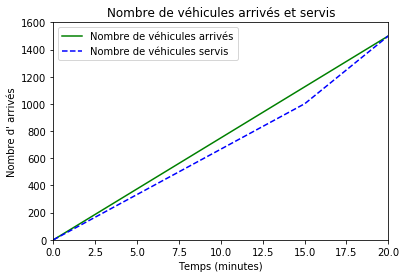

In [4]:
t, nombreDeTraitements, nombreArrives, nombreServis, idx = DessinGraphique()

In [5]:
# Durée d’existence de la file
print("%.1f min"%t[idx])

20.0 min


In [6]:
# Vérification (avec la formule)
t_b  = 15
beta = 2/3 # Passage de 3 à 2 voies
q    = debit
s    = 3*capacite

T = t_b*(1 - beta)/(1 - q/s)

print("%.1f min"%T)

20.0 min


In [7]:
# Longueur maximale
Q_15min =  nombreArrives[15*100] - nombreServis[15*100] # Q(t) = S(t) - A(t) à l'instant t = 15 min.

print("%d véhicules"%Q_15min)

125 véhicules


In [8]:
# Longueur moyenne
aire = 1500*20/2 - (1000*15/2 + 1000*5 + 500*5/2)

Q_moy = aire/20

print("%.1f véhicules"%Q_moy)

62.5 véhicules


In [9]:
# Retard total
D_tot = s**2*t_b**2*(1 - beta)*(q/s - beta)/(2*(s - q))

print("%d minutes"%D_tot)

1250 minutes


In [10]:
# Retard moyen
D_moy = t_b*(q/s - beta)/(2*q/s)

print("%.3f minutes"%D_moy)

0.833 minutes


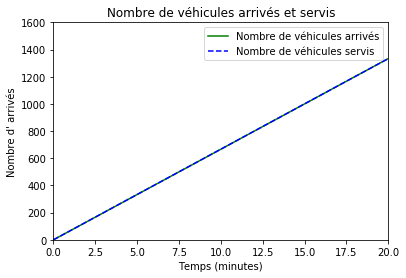

In [11]:
# Exercice 2
debit = 4000/60 # véh/min

t, nombreDeTraitements, nombreArrives, nombreServis, idx = DessinGraphique()

In [12]:
# Durée d’existence de la file
t_b  = 0
beta = 2/3 # Passage de 3 à 2 voies
q    = debit
s    = 3*capacite

T = t_b*(1 - beta)/(1 - q/s)

print("%.d min"%T)

0 min


In [13]:
# Longueur maximale
Q_15min =  nombreArrives[15*100] - nombreServis[15*100] # Q(t) = S(t) - A(t) à l'instant t = 15 min.

print("%d véhicules"%Q_15min)

0 véhicules


In [14]:
# Longueur moyenne
aire = 0

Q_moy = aire/20

print("%d véhicules"%Q_moy)

0 véhicules


In [15]:
# Retard total
D_tot = s**2*t_b**2*(1 - beta)*(q/s - beta)/(2*(s - q))

print("%d minutes"%D_tot)

0 minutes


In [16]:
# Retard moyen
D_moy = t_b*(q/s - beta)/(2*q/s)

print("%d minutes"%D_moy)

0 minutes


In [17]:
# Exercice 3
debit_arrivees = 4500/60 # veh/min

v_f  = 100/60 # Km/min
v_mu = 10/60 # Km/min
mu   = 6000/60 # veh/min
t_f  = 1/100*60 # min

v = []
a = []
d = []
w = []
t = []
b = []

a.append(1/debit_arrivees) # On considère le premier véhicule qui arrive au point en amont
v.append(a[0] + t_f)
d.append(v[0])
w.append(d[0]-v[0])
t.append(w[0]/(1 - v_mu/v_f))
b.append(d[0] - t[0])

In [18]:
n = 1000

for n in range(n):
    a.append(a[n-1] + 1/debit_arrivees)
    v.append(a[n] + t_f)
    d.append(max(v[n], d[n-1] + 1/mu))
    w.append(d[n]-v[n])
    t.append(w[n]/(1 - v_mu/v_f))
    b.append(d[n] - t[n])

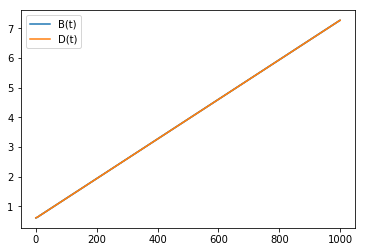

In [19]:
# Courbes du nombre de véhicules arrivés dans la file ( B(t) ) et du nombre de véhicules sortis de la file ( D(t) )
t = np.arange(0, (n + 2), 1)

plt.plot(t, b, label = "B(t)")
plt.plot(t, d, label = "D(t)")
plt.legend()
plt.savefig('Donnees_produites/Figures/graphique_inconcluant.eps', format='eps')
plt.show()

In [20]:
# Exercice 4
# On suppose des arrivées aléatoires qui suivent le modèle M/D/1
lambda_moy = 4500/60
mu         = 6000/60

rho    = lambda_moy/mu

# Longueur moyenne de la file d’attente
Q_moy = rho**2 / ( 2*(1 - rho) )
print("%.3f véhicules"%Q_moy)

1.125 véhicules


In [21]:
# Le temps moyen d'attente dans la queue
D_f_moy = rho / ( 2*mu*(1 - rho) )
print("%.3f minutes"%D_f_moy)

0.015 minutes


In [22]:
# Le temps moyen d'attente dans le système
D_moy = D_f_moy + 1/mu
print("%.3f minutes"%D_moy)

0.025 minutes
